# Principal Component Analysis (PCA)

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [2]:
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

/usr/local/anaconda3/envs/bio/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))


In [3]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')

In [4]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
## MDAnalysis
u = mda.Universe(PSF, DCD)
## MDTraj
t = mdt.load(DCD, top=PSF)
## PyTraj
p = mdp.load(DCD, top=PSF)

## PCA Simple

(100, 2)


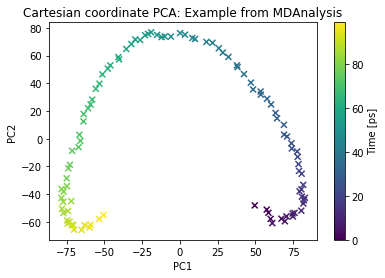

In [5]:
## MDTraj
%matplotlib inline
import mdtraj as mdt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
t.superpose(t, 0)

reduced_cartesian = pca1.fit_transform(t.xyz.reshape(t.n_frames, t.n_atoms * 3))
print(reduced_cartesian.shape)

plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=t.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: Example from MDAnalysis')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

(100, 24854775)


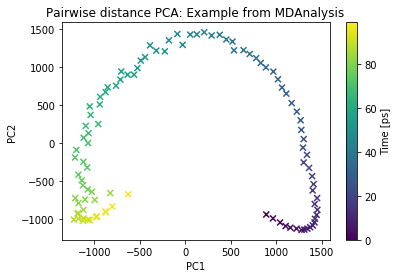

In [6]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(t.n_atoms), 2))
pairwise_distances = mdt.geometry.compute_distances(t, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=t.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA: Example from MDAnalysis')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

In [7]:
## PyTraj

# compute pca
data = mdp.pca(p, mask='!@H=', n_vecs=2)
print('projection values of each frame to first mode = {} \n'.format(data[0][0]))
print('projection values of each frame to second mode = {} \n'.format(data[0][1]))
print('eigvenvalues of first two modes', data[1][0])
print("")
print('eigvenvectors of first two modes: \n', data[1][1])

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

projection_data = data[0]
from matplotlib import pyplot as plt

plt.scatter(projection_data[0], projection_data[1], marker='o', c=range(p.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')

projection values of each frame to first mode = [ 295.05038  340.3979   346.7022  ... -331.5953  -299.34775 -292.39395] 

projection values of each frame to second mode = [-282.5111  -298.85364 -312.57727 ... -365.82236 -341.76428 -329.64636] 

eigvenvalues of first two modes [126831.46443979  84635.14751692]

eigvenvectors of first two modes: 
 [[-0.00179304  0.00277877  0.00065981 ...  0.0059089  -0.02721305
  -0.01407039]
 [-0.00127459 -0.00098332 -0.00078939 ...  0.00679693  0.0196621
   0.00473171]]


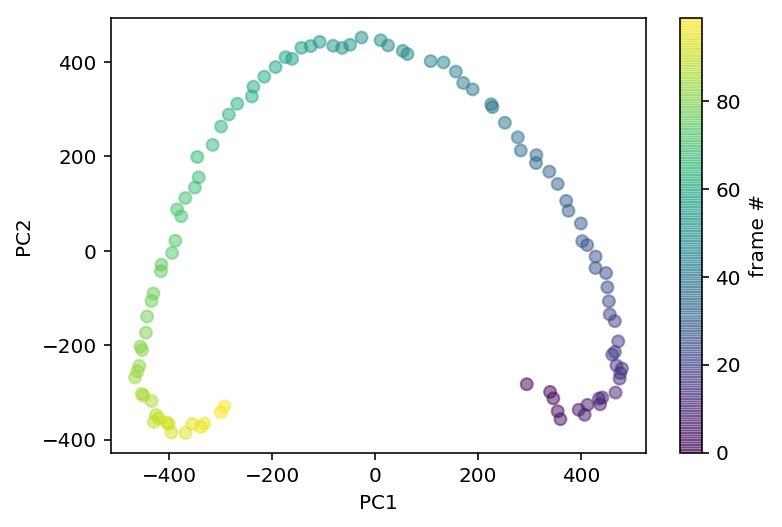

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

projection_data = data[0]
from matplotlib import pyplot as plt

plt.scatter(projection_data[0], projection_data[1], marker='o', c=range(p.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')